In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree,ensemble
from matplotlib.colors import LogNorm
import xarray as xr
import time
# my own 'library' below
####################
import sys
# my own 'library' below
src_path='../src/'
sys.path.append(src_path)
####################
import cf_tree_regression as cft
from importlib import reload

In [2]:
from jupyterthemes import jtplot
# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()
jtplot.style(theme='chesterish')

- ### decision tree regression

In [3]:
 # DEFAULT PARAMETERS - global variables
curdir='/home/igor/UNI/Master_Project/Script/Data/'
fname='ncr_pdf_douze_025deg.nc'
goal_var = 'cl_l'
input_vars = ['qsm', 'qtm', 'qlm', 'skew_l', 'var_l', 'var_t', 'tm', 'pm']
add_vars = ['qvlm','qsm']
eval_fraction=0.2
regtype = 'decision_tree'
# ['decision_tree','gradient boost','random forest']
max_depth_in=None

In [4]:
# make sure that changes in module are applied in j notebook
reload(cft)

# DATA PREPROCESSING
prepro=cft.DataPrepro(curdir,fname,goal_var,input_vars,add_vars,eval_fraction)
# methods should be in this particular order!!
processed_data = prepro.get_processed_data(split_randomly=True)


2021-06-28 21:35:29,176 - cf_tree_regression - INFO - Read netcdf
2021-06-28 21:35:29,197 - cf_tree_regression - INFO - Processed goal vars =cl_l
2021-06-28 21:35:29,309 - cf_tree_regression - WARNING - Missing values in skew_l field were masked!
2021-06-28 21:35:29,439 - cf_tree_regression - INFO - Processed input vars =qsm,qtm,qlm,skew_l,var_l,var_t,tm,pm
2021-06-28 21:35:29,485 - cf_tree_regression - INFO - Processed add vars =qvlm,qsm
2021-06-28 21:35:29,486 - cf_tree_regression - INFO - splitting the input/output data sets randomly
2021-06-28 21:35:29,563 - cf_tree_regression - INFO - Fraction of Input/goal data for evaluation 0.2


In [5]:
# REGRESSION
goalvar_pred, goalvar_eval = cft.regression(regtype,processed_data,max_depth_in)

2021-06-28 21:35:33,342 - cf_tree_regression - INFO - decision_tree regression is chosen
2021-06-28 21:35:43,587 - cf_tree_regression - INFO - Training complete
2021-06-28 21:35:43,615 - cf_tree_regression - INFO - Prediction complete


In [7]:
corrmat=np.corrcoef(goalvar_pred, goalvar_eval)
corr=corrmat[0,1]
corr

0.9933824286711328

In [11]:
corr=covmat[0][1]/(np.sqrt(covmat[0,0])*np.sqrt(covmat[1,1]))
corr

0.9934987334846803

/home/igor/anaconda3/envs/MSC_env/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/igor/anaconda3/envs/MSC_env/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


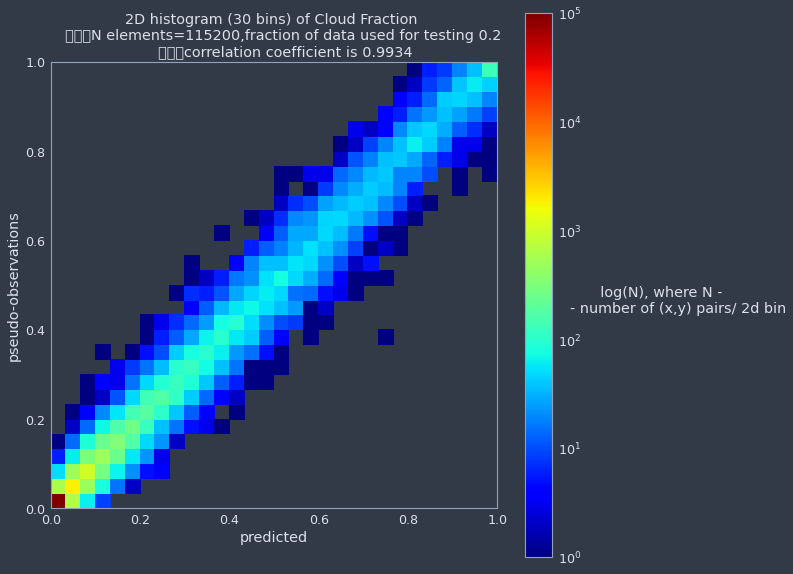

In [8]:
# VISUALISATION
# colormap of lognormalized due to high values range.
# empty regions correspond to log(0)=-inf
reload(cft)
cft.hist_plot(goalvar_pred, goalvar_eval, eval_fraction,bins=30,vmax=None,cmax=None,
              norm=LogNorm())

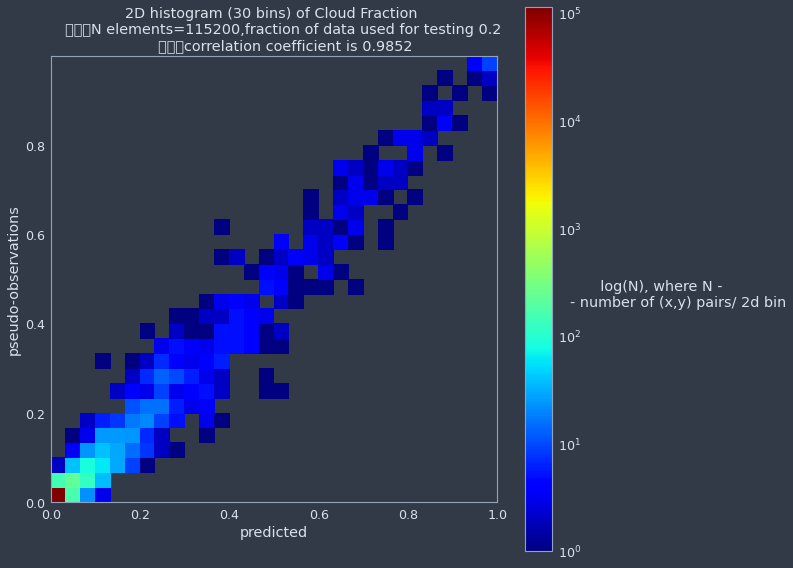

In [111]:
# VISUALISATION
# colormap of lognormalized due to high values range.
# empty regions correspond to log(0)=-inf
reload(cft)
cft.hist_plot(goalvar_pred, goalvar_eval, eval_fraction,bins=30,vmax=None,cmax=None,
              norm=LogNorm())

- ### decision tree regression without additional varibles

In [13]:
!pwd 

/home/igor/UNI/Master_Project/Script/MSC_repo/regression


In [9]:
 # DEFAULT PARAMETERS - global variables
curdir='/home/igor/UNI/Master_Project/Script/Data/'
fname='ncr_pdf_douze_0125deg.nc'
goal_var = 'cl_l'
input_vars = ['qsm', 'qtm', 'qlm', 'skew_l', 'var_l', 'var_t', 'tm', 'pm']
# add_vars = ['qvlm','qsm']
add_vars = []
eval_fraction=0.2
regtype = 'decision_tree'
# ['decision_tree','gradient boost','random forest']
max_depth_in=None

In [10]:
# make sure that changes in module are applied in j notebook
reload(cft)

# DATA PREPROCESSING
prepro=cft.DataPrepro(curdir,fname,goal_var,input_vars,add_vars,eval_fraction)
# methods should be in this particular order!!
processed_data = prepro.get_processed_data()

2021-06-28 21:36:50,601 - cf_tree_regression - INFO - Read netcdf
2021-06-28 21:36:52,148 - cf_tree_regression - INFO - Processed goal vars =cl_l
2021-06-28 21:36:52,542 - cf_tree_regression - WARNING - Missing values in skew_l field were masked!
2021-06-28 21:36:53,014 - cf_tree_regression - INFO - Processed input vars =qsm,qtm,qlm,skew_l,var_l,var_t,tm,pm
2021-06-28 21:36:53,015 - cf_tree_regression - INFO - No additional data provided
2021-06-28 21:36:53,015 - cf_tree_regression - INFO - splitting the input/output data sets randomly
2021-06-28 21:36:53,460 - cf_tree_regression - INFO - Fraction of Input/goal data for evaluation 0.2


In [11]:
# REGRESSION
goalvar_pred, goalvar_eval = cft.regression(regtype,processed_data,max_depth_in)

2021-06-28 21:36:57,324 - cf_tree_regression - INFO - decision_tree regression is chosen
2021-06-28 21:37:47,410 - cf_tree_regression - INFO - Training complete
2021-06-28 21:37:47,514 - cf_tree_regression - INFO - Prediction complete


/home/igor/anaconda3/envs/MSC_env/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/igor/anaconda3/envs/MSC_env/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


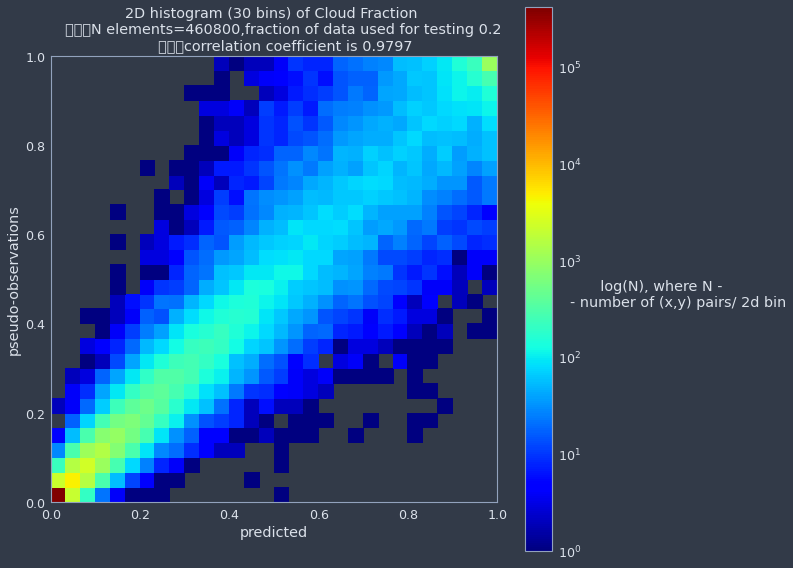

In [12]:
# VISUALISATION
# colormap of lognormalized due to high values range.
# empty regions correspond to log(0)=-inf
reload(cft)
cft.hist_plot(goalvar_pred, goalvar_eval,eval_fraction,bins=30,vmax=None,cmax=None,
              norm=LogNorm());

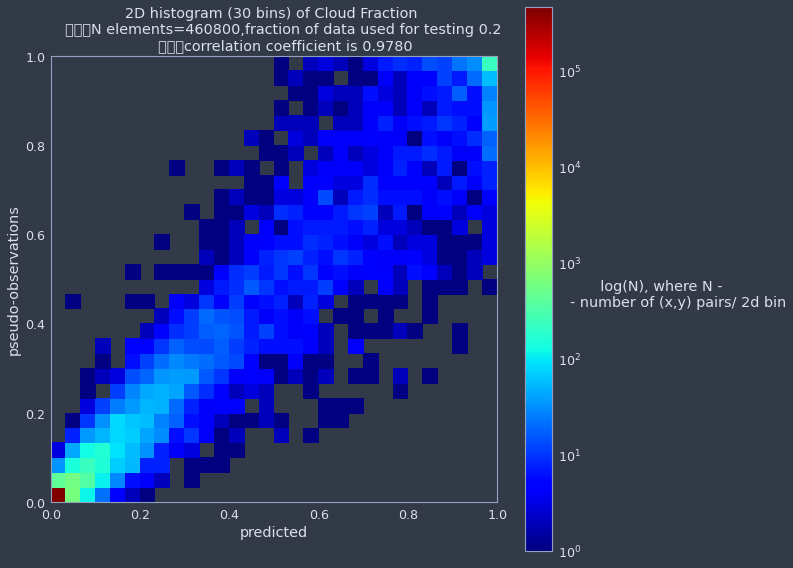

In [124]:
# VISUALISATION
# colormap of lognormalized due to high values range.
# empty regions correspond to log(0)=-inf
reload(cft)
cft.hist_plot(goalvar_pred, goalvar_eval,eval_fraction,bins=30,vmax=None,cmax=None,
              norm=LogNorm());

/home/igor/UNI/Master Project/Script/MSC_repo/tree_regression/cf_tree_regression.py:222: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.set_title('2D histogram of predicted vs evaluated goal variable')


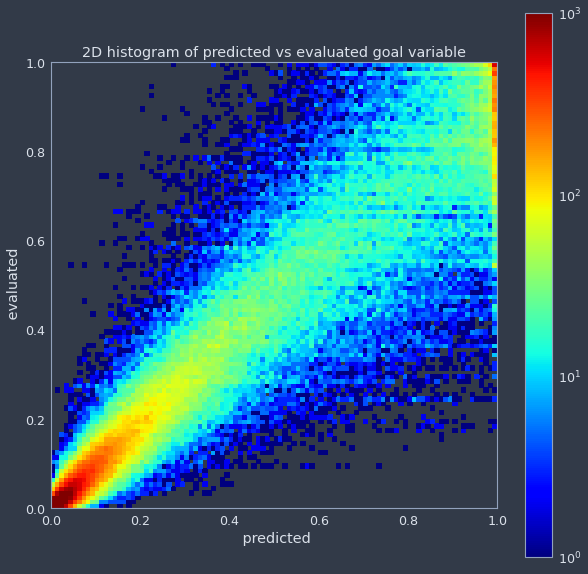

In [46]:
# VISUALISATION
# colormap of lognormalized due to high values range.
# empty regions correspond to log(0)=-inf
reload(cft)
cft.hist_plot(goalvar_pred, goalvar_eval)

- ### Random forest regression max_depth_in=40

In [125]:
 # DEFAULT PARAMETERS - global variables
curdir='/home/igor/UNI/Master_Project/Script/Data/'
fname='ncr_pdf_douze_0125deg.nc'
goal_var = 'cl_l'
input_vars = ['qsm', 'qtm', 'qlm', 'skew_l', 'var_l', 'var_t', 'tm', 'pm']
add_vars = ['qvlm','qsm']
eval_fraction=0.6
regtype = 'random forest'
max_depth_in=40

In [126]:
# make sure that changes in module are applied in j notebook
reload(cft)

# DATA PREPROCESSING
prepro=cft.DataPrepro(curdir,fname,goal_var,input_vars,add_vars,eval_fraction)
# methods should be in this particular order!!
processed_data = prepro.get_processed_data()

2021-06-28 11:33:34,138 - cf_tree_regression - INFO - Read netcdf
2021-06-28 11:33:34,138 - cf_tree_regression - INFO - Read netcdf
2021-06-28 11:33:34,138 - cf_tree_regression - INFO - Read netcdf
2021-06-28 11:33:34,138 - cf_tree_regression - INFO - Read netcdf
2021-06-28 11:33:34,138 - cf_tree_regression - INFO - Read netcdf
2021-06-28 11:33:34,138 - cf_tree_regression - INFO - Read netcdf
2021-06-28 11:33:34,138 - cf_tree_regression - INFO - Read netcdf
2021-06-28 11:33:34,138 - cf_tree_regression - INFO - Read netcdf
2021-06-28 11:33:34,138 - cf_tree_regression - INFO - Read netcdf
2021-06-28 11:33:34,138 - cf_tree_regression - INFO - Read netcdf
2021-06-28 11:33:34,138 - cf_tree_regression - INFO - Read netcdf
2021-06-28 11:33:34,138 - cf_tree_regression - INFO - Read netcdf
2021-06-28 11:33:34,138 - cf_tree_regression - INFO - Read netcdf
2021-06-28 11:33:34,138 - cf_tree_regression - INFO - Read netcdf
2021-06-28 11:33:34,138 - cf_tree_regression - INFO - Read netcdf
2021-06-28

2021-06-28 11:33:34,291 - cf_tree_regression - INFO - Processed goal vars =cl_l
2021-06-28 11:33:34,291 - cf_tree_regression - INFO - Processed goal vars =cl_l
2021-06-28 11:33:34,291 - cf_tree_regression - INFO - Processed goal vars =cl_l
2021-06-28 11:33:34,291 - cf_tree_regression - INFO - Processed goal vars =cl_l
2021-06-28 11:33:34,291 - cf_tree_regression - INFO - Processed goal vars =cl_l
2021-06-28 11:33:34,291 - cf_tree_regression - INFO - Processed goal vars =cl_l
2021-06-28 11:33:34,291 - cf_tree_regression - INFO - Processed goal vars =cl_l
2021-06-28 11:33:34,291 - cf_tree_regression - INFO - Processed goal vars =cl_l
2021-06-28 11:33:34,291 - cf_tree_regression - INFO - Processed goal vars =cl_l
2021-06-28 11:33:34,291 - cf_tree_regression - INFO - Processed goal vars =cl_l
2021-06-28 11:33:34,291 - cf_tree_regression - INFO - Processed goal vars =cl_l
2021-06-28 11:33:34,291 - cf_tree_regression - INFO - Processed goal vars =cl_l
2021-06-28 11:33:34,291 - cf_tree_regres

2021-06-28 11:33:34,797 - cf_tree_regression - WARNING - Missing values in skew_l field were masked!
2021-06-28 11:33:34,797 - cf_tree_regression - WARNING - Missing values in skew_l field were masked!
2021-06-28 11:33:34,797 - cf_tree_regression - WARNING - Missing values in skew_l field were masked!
2021-06-28 11:33:34,797 - cf_tree_regression - WARNING - Missing values in skew_l field were masked!
2021-06-28 11:33:34,797 - cf_tree_regression - WARNING - Missing values in skew_l field were masked!
2021-06-28 11:33:34,797 - cf_tree_regression - WARNING - Missing values in skew_l field were masked!
2021-06-28 11:33:34,797 - cf_tree_regression - WARNING - Missing values in skew_l field were masked!
2021-06-28 11:33:34,797 - cf_tree_regression - WARNING - Missing values in skew_l field were masked!
2021-06-28 11:33:34,797 - cf_tree_regression - WARNING - Missing values in skew_l field were masked!
2021-06-28 11:33:34,797 - cf_tree_regression - WARNING - Missing values in skew_l field wer

2021-06-28 11:33:35,410 - cf_tree_regression - INFO - Processed input vars =qsm,qtm,qlm,skew_l,var_l,var_t,tm,pm
2021-06-28 11:33:35,410 - cf_tree_regression - INFO - Processed input vars =qsm,qtm,qlm,skew_l,var_l,var_t,tm,pm
2021-06-28 11:33:35,410 - cf_tree_regression - INFO - Processed input vars =qsm,qtm,qlm,skew_l,var_l,var_t,tm,pm
2021-06-28 11:33:35,410 - cf_tree_regression - INFO - Processed input vars =qsm,qtm,qlm,skew_l,var_l,var_t,tm,pm
2021-06-28 11:33:35,410 - cf_tree_regression - INFO - Processed input vars =qsm,qtm,qlm,skew_l,var_l,var_t,tm,pm
2021-06-28 11:33:35,410 - cf_tree_regression - INFO - Processed input vars =qsm,qtm,qlm,skew_l,var_l,var_t,tm,pm
2021-06-28 11:33:35,410 - cf_tree_regression - INFO - Processed input vars =qsm,qtm,qlm,skew_l,var_l,var_t,tm,pm
2021-06-28 11:33:35,410 - cf_tree_regression - INFO - Processed input vars =qsm,qtm,qlm,skew_l,var_l,var_t,tm,pm
2021-06-28 11:33:35,410 - cf_tree_regression - INFO - Processed input vars =qsm,qtm,qlm,skew_l,v

2021-06-28 11:33:35,869 - cf_tree_regression - INFO - Processed add vars =qvlm,qsm
2021-06-28 11:33:35,869 - cf_tree_regression - INFO - Processed add vars =qvlm,qsm
2021-06-28 11:33:35,869 - cf_tree_regression - INFO - Processed add vars =qvlm,qsm
2021-06-28 11:33:35,869 - cf_tree_regression - INFO - Processed add vars =qvlm,qsm
2021-06-28 11:33:35,869 - cf_tree_regression - INFO - Processed add vars =qvlm,qsm
2021-06-28 11:33:35,869 - cf_tree_regression - INFO - Processed add vars =qvlm,qsm
2021-06-28 11:33:35,869 - cf_tree_regression - INFO - Processed add vars =qvlm,qsm
2021-06-28 11:33:35,869 - cf_tree_regression - INFO - Processed add vars =qvlm,qsm
2021-06-28 11:33:35,869 - cf_tree_regression - INFO - Processed add vars =qvlm,qsm
2021-06-28 11:33:35,869 - cf_tree_regression - INFO - Processed add vars =qvlm,qsm
2021-06-28 11:33:35,869 - cf_tree_regression - INFO - Processed add vars =qvlm,qsm
2021-06-28 11:33:35,869 - cf_tree_regression - INFO - Processed add vars =qvlm,qsm
2021

2021-06-28 11:33:35,978 - cf_tree_regression - INFO - Fraction of Input/goal data for evaluation 0.6
2021-06-28 11:33:35,978 - cf_tree_regression - INFO - Fraction of Input/goal data for evaluation 0.6
2021-06-28 11:33:35,978 - cf_tree_regression - INFO - Fraction of Input/goal data for evaluation 0.6
2021-06-28 11:33:35,978 - cf_tree_regression - INFO - Fraction of Input/goal data for evaluation 0.6
2021-06-28 11:33:35,978 - cf_tree_regression - INFO - Fraction of Input/goal data for evaluation 0.6
2021-06-28 11:33:35,978 - cf_tree_regression - INFO - Fraction of Input/goal data for evaluation 0.6
2021-06-28 11:33:35,978 - cf_tree_regression - INFO - Fraction of Input/goal data for evaluation 0.6
2021-06-28 11:33:35,978 - cf_tree_regression - INFO - Fraction of Input/goal data for evaluation 0.6
2021-06-28 11:33:35,978 - cf_tree_regression - INFO - Fraction of Input/goal data for evaluation 0.6
2021-06-28 11:33:35,978 - cf_tree_regression - INFO - Fraction of Input/goal data for evalu

In [127]:
# REGRESSION
goalvar_pred, goalvar_eval = cft.regression(regtype,processed_data,max_depth_in)

2021-06-28 11:33:47,186 - cf_tree_regression - INFO - random forest regression is chosen
2021-06-28 11:33:47,186 - cf_tree_regression - INFO - random forest regression is chosen
2021-06-28 11:33:47,186 - cf_tree_regression - INFO - random forest regression is chosen
2021-06-28 11:33:47,186 - cf_tree_regression - INFO - random forest regression is chosen
2021-06-28 11:33:47,186 - cf_tree_regression - INFO - random forest regression is chosen
2021-06-28 11:33:47,186 - cf_tree_regression - INFO - random forest regression is chosen
2021-06-28 11:33:47,186 - cf_tree_regression - INFO - random forest regression is chosen
2021-06-28 11:33:47,186 - cf_tree_regression - INFO - random forest regression is chosen
2021-06-28 11:33:47,186 - cf_tree_regression - INFO - random forest regression is chosen
2021-06-28 11:33:47,186 - cf_tree_regression - INFO - random forest regression is chosen
2021-06-28 11:33:47,186 - cf_tree_regression - INFO - random forest regression is chosen
2021-06-28 11:33:47,1

2021-06-28 11:37:08,397 - cf_tree_regression - INFO - Training complete
2021-06-28 11:37:08,397 - cf_tree_regression - INFO - Training complete
2021-06-28 11:37:08,397 - cf_tree_regression - INFO - Training complete
2021-06-28 11:37:08,397 - cf_tree_regression - INFO - Training complete
2021-06-28 11:37:08,397 - cf_tree_regression - INFO - Training complete
2021-06-28 11:37:08,397 - cf_tree_regression - INFO - Training complete
2021-06-28 11:37:08,397 - cf_tree_regression - INFO - Training complete
2021-06-28 11:37:08,397 - cf_tree_regression - INFO - Training complete
2021-06-28 11:37:08,397 - cf_tree_regression - INFO - Training complete
2021-06-28 11:37:08,397 - cf_tree_regression - INFO - Training complete
2021-06-28 11:37:08,397 - cf_tree_regression - INFO - Training complete
2021-06-28 11:37:08,397 - cf_tree_regression - INFO - Training complete
2021-06-28 11:37:08,397 - cf_tree_regression - INFO - Training complete
2021-06-28 11:37:08,397 - cf_tree_regression - INFO - Training c

2021-06-28 11:37:09,542 - cf_tree_regression - INFO - Prediction complete
2021-06-28 11:37:09,542 - cf_tree_regression - INFO - Prediction complete
2021-06-28 11:37:09,542 - cf_tree_regression - INFO - Prediction complete
2021-06-28 11:37:09,542 - cf_tree_regression - INFO - Prediction complete
2021-06-28 11:37:09,542 - cf_tree_regression - INFO - Prediction complete
2021-06-28 11:37:09,542 - cf_tree_regression - INFO - Prediction complete
2021-06-28 11:37:09,542 - cf_tree_regression - INFO - Prediction complete
2021-06-28 11:37:09,542 - cf_tree_regression - INFO - Prediction complete
2021-06-28 11:37:09,542 - cf_tree_regression - INFO - Prediction complete
2021-06-28 11:37:09,542 - cf_tree_regression - INFO - Prediction complete
2021-06-28 11:37:09,542 - cf_tree_regression - INFO - Prediction complete
2021-06-28 11:37:09,542 - cf_tree_regression - INFO - Prediction complete
2021-06-28 11:37:09,542 - cf_tree_regression - INFO - Prediction complete
2021-06-28 11:37:09,542 - cf_tree_regr

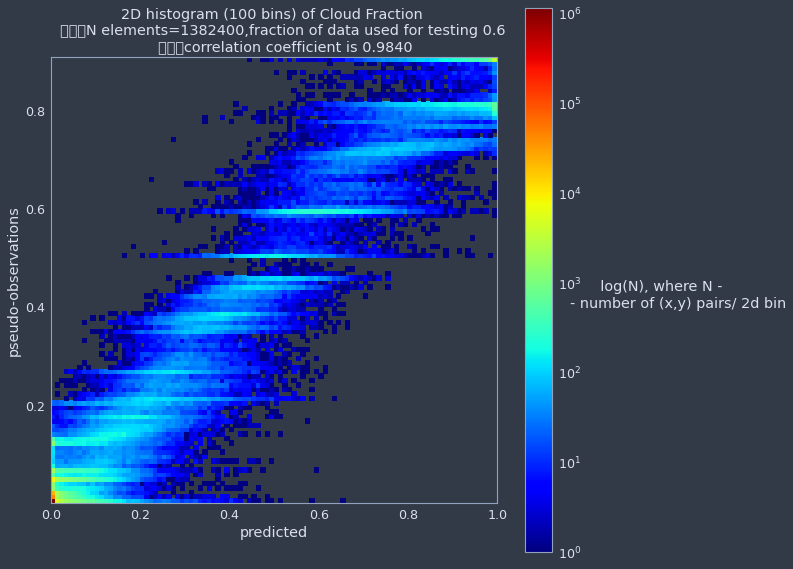

In [131]:
# VISUALISATION
# colormap of lognormalized due to high values range.
# empty regions correspond to log(0)=-inf
reload(cft)
cft.hist_plot(goalvar_pred, goalvar_eval,eval_fraction,bins=100,vmax=None,cmax=None,
              norm=LogNorm())

- ### Random forest regression max_depth_in=None

In [48]:
 # DEFAULT PARAMETERS - global variables
curdir='/home/igor/UNI/Master Project/Script/Data/'
fname='ncr_pdf_douze_0125deg.nc'
goal_var = 'cl_l'
input_vars = ['qsm', 'qtm', 'qlm', 'skew_l', 'var_l', 'var_t', 'tm', 'pm']
add_vars = ['qvlm','qsm']
eval_fraction=0.6
regtype = 'random forest'
max_depth_in=None

In [52]:
# make sure that changes in module are applied in j notebook
reload(cft)

# DATA PREPROCESSING
prepro=cft.DataPrepro(curdir,fname,goal_var,input_vars,add_vars,eval_fraction)
# methods should be in this particular order!!
processed_data = prepro.get_processed_data()

/home/igor/UNI/Master Project/Script/MSC_repo/tree_regression/cf_tree_regression.py:96: UserWarning: Missing values in skew_l field were masked!
  warnings.warn("Missing values in {} field were masked!".format(var))


In [53]:
cft.regression??

In [ ]:
# REGRESSION
goalvar_pred, goalvar_eval = cft.regression(regtype,processed_data,max_depth_in)

/home/igor/UNI/Master Project/Script/MSC_repo/tree_regression/cf_tree_regression.py:222: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.set_title('2D histogram of predicted vs evaluated goal variable')


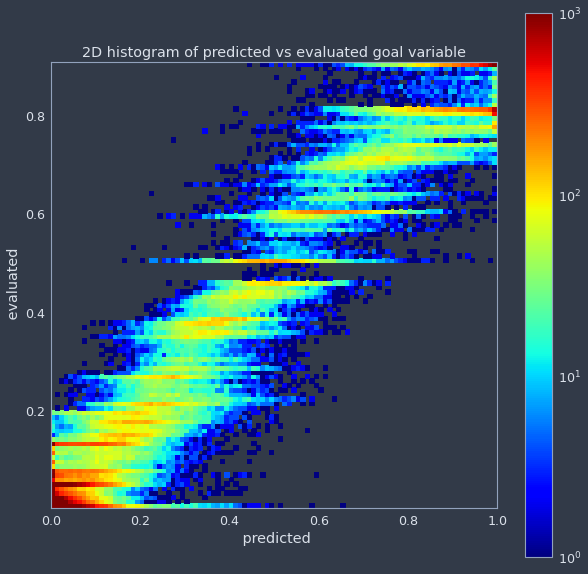

In [31]:
# VISUALISATION
# colormap of lognormalized due to high values range.
# empty regions correspond to log(0)=-inf
reload(cft)
cft.hist_plot(goalvar_pred, goalvar_eval)